In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("./Income1.csv",index_col="Unnamed: 0")
data.head()

,Education,Income
1,10.000000,26.658839
2,10.401338,27.306435
3,10.842809,22.132410
4,11.244147,21.169841
5,11.645485,15.192634


In [3]:
data = data.sample(len(data))#乱序，原始数据label为连续型，递增

In [4]:
data.head()

,Education,Income
18,17.023411,61.336621
5,11.645485,15.192634
22,18.709030,68.959009
28,21.157191,77.355021
23,19.110368,74.614639


In [5]:
data.describe()

,Education,Income
count,30.000000,30.000000
mean,16.000000,50.145469
std,3.642965,21.141553
min,10.000000,15.192634
25%,12.989967,29.078897
50%,16.000000,49.871749
75%,19.010033,71.140149
max,22.000000,80.260571


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 18 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  30 non-null     float64
 1   Income     30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


# 3.特征标签分离

In [7]:
X = data['Education']
y = data['Income']

# 导入数据集划分库

In [8]:
from sklearn.model_selection import KFold,ShuffleSplit,StratifiedKFold

# 5. 可视化K折划分，K = 5

训练集索引-1 [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
测试集索引-1 [0 1 2 3 4 5]
训练集索引-2 [ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
测试集索引-2 [ 6  7  8  9 10 11]
训练集索引-3 [ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23 24 25 26 27 28 29]
测试集索引-3 [12 13 14 15 16 17]
训练集索引-4 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 24 25 26 27 28 29]
测试集索引-4 [18 19 20 21 22 23]
训练集索引-5 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
测试集索引-5 [24 25 26 27 28 29]


Text(0.5, 0, 'index')

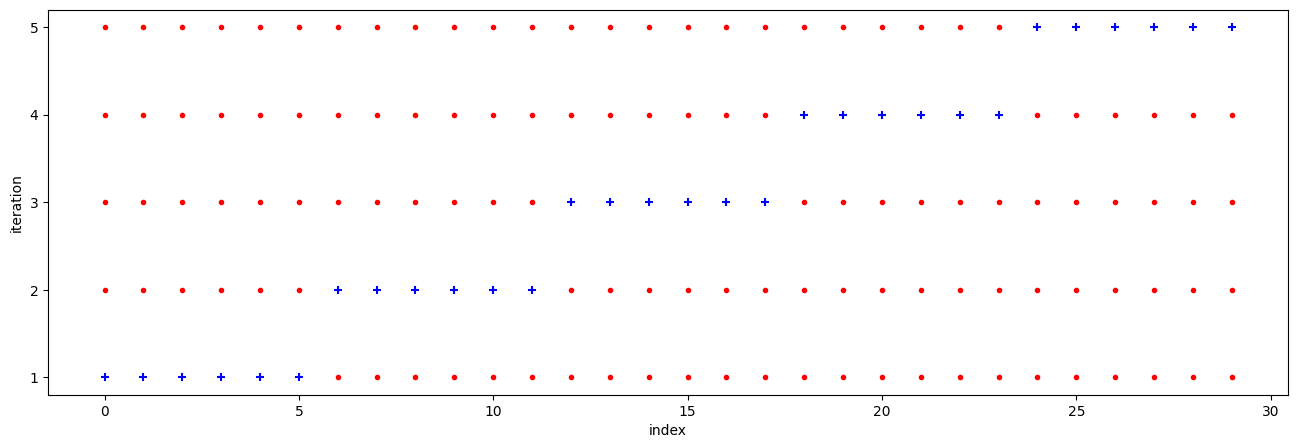

In [9]:
kf = KFold(n_splits=5)
kf_cv= kf.split(X)
k = 1
plt.figure(figsize=(16,5))
for train_indices,test_indices in kf_cv:
    plt.scatter(train_indices,[k]*len(train_indices),marker=".",c="r")
    plt.scatter(test_indices,[k]*len(test_indices),marker="+",c="b")
    print("训练集索引-%d"%k,train_indices)
    print("测试集索引-%d"%k,test_indices)
    k+=1
    
plt.yticks([i for i in range(1,6)],["1","2","3","4","5"])
plt.ylabel("iteration")
plt.xlabel("index")

# 6.可视化乱序后，K折划分，k=5

训练集索引-1 [ 0  1  4  6  8  9 10 11 12 13 14 15 16 17 18 19 22 23 24 25 26 27 28 29]
测试集索引-1 [ 2  3  5  7 20 21]
训练集索引-2 [ 0  2  3  4  5  6  7  8  9 10 11 15 16 17 18 20 21 22 23 24 25 26 28 29]
测试集索引-2 [ 1 12 13 14 19 27]
训练集索引-3 [ 0  1  2  3  4  5  7  8  9 10 12 13 14 15 16 17 19 20 21 22 25 26 27 29]
测试集索引-3 [ 6 11 18 23 24 28]
训练集索引-4 [ 0  1  2  3  4  5  6  7  9 11 12 13 14 15 16 17 18 19 20 21 23 24 27 28]
测试集索引-4 [ 8 10 22 25 26 29]
训练集索引-5 [ 1  2  3  5  6  7  8 10 11 12 13 14 18 19 20 21 22 23 24 25 26 27 28 29]
测试集索引-5 [ 0  4  9 15 16 17]


Text(0.5, 0, 'index')

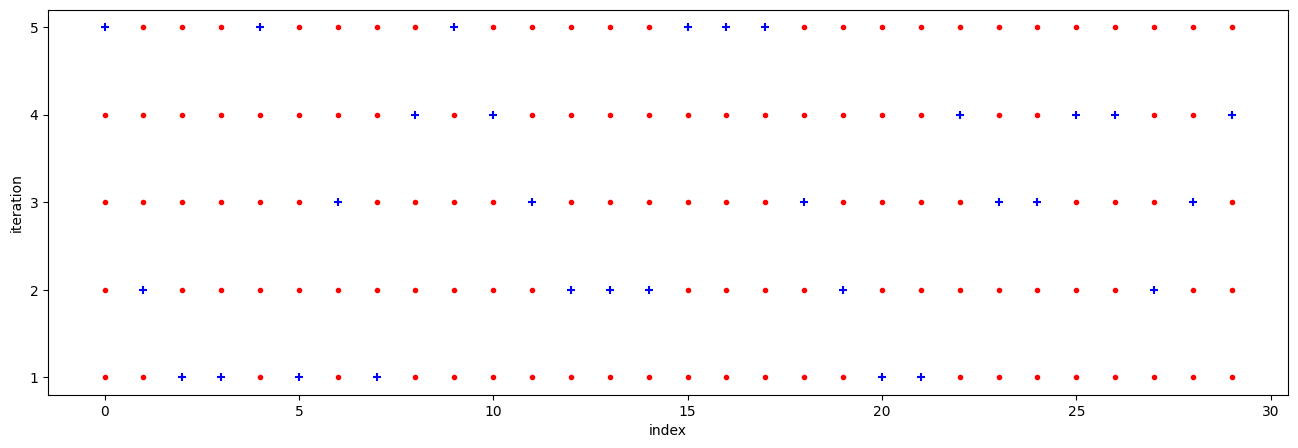

In [10]:
# 每次选其中一折作为测试集，其他为训练集
kfs = KFold(n_splits=5,random_state=10,shuffle=True)
kfs_cv = kfs.split(X)
k = 1
plt.figure(figsize=(16,5))
for train_indices,test_indices in kfs_cv:
    plt.scatter(train_indices,[k]*len(train_indices),marker='.',c='r')
    plt.scatter(test_indices,[k]*len(test_indices),marker='+',c='b')
    print("训练集索引-%d"%k,train_indices)
    print("测试集索引-%d"%k,test_indices)
    k+=1
    
plt.yticks([i for i in range(1,6)],["1","2","3","4","5"])
plt.ylabel("iteration")
plt.xlabel("index")

# 可视化层次K折划分，K=3

In [11]:
from sklearn.preprocessing import Binarizer

In [12]:
Bi_ = Binarizer(threshold=50)
y1 = Bi_.fit_transform(data[["Income"]])#y1为离散化标签，0,1

In [13]:
skf = KFold(n_splits=3,random_state=10,shuffle=True)
skf_cv = skf.split(X,y1)

训练集索引-1 [ 0  4  6  8  9 10 11 14 15 16 17 18 19 22 23 24 25 26 28 29]
测试集索引-1 [ 1  2  3  5  7 12 13 20 21 27]
训练集索引-2 [ 0  1  2  3  4  5  7  8  9 12 13 15 16 17 20 21 25 26 27 29]
测试集索引-2 [ 6 10 11 14 18 19 22 23 24 28]
训练集索引-3 [ 1  2  3  5  6  7 10 11 12 13 14 18 19 20 21 22 23 24 27 28]
测试集索引-3 [ 0  4  8  9 15 16 17 25 26 29]


Text(0.5, 0, 'index')

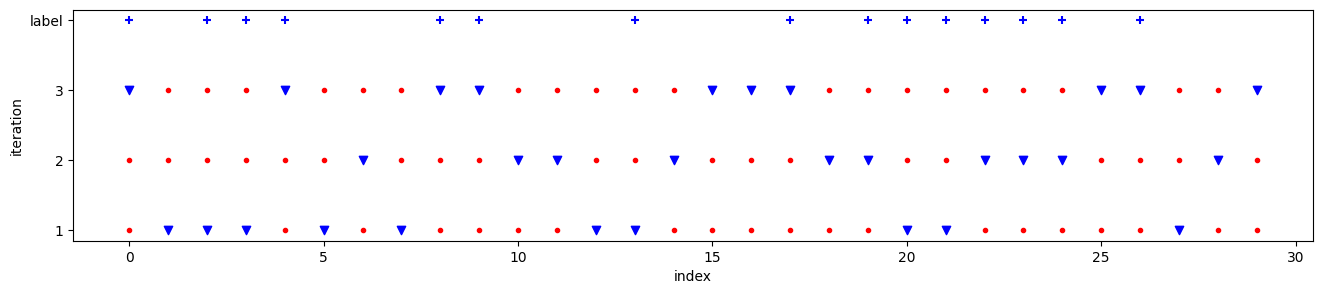

In [14]:
kk = [k*j for k,j in enumerate(y1) if j!=0]
k=1
plt.figure(figsize=(16,3))
for train_indices,test_indices in skf_cv:
    plt.scatter(train_indices,[k]*len(train_indices),marker=".",c="r")
    plt.scatter(test_indices,[k]*len(test_indices),marker="v",c="b")
    print("训练集索引-%d"%k,train_indices)
    print("测试集索引-%d"%k,test_indices)
    k+=1
plt.scatter(kk,[k]*len(kk),marker="+",c="b")   
plt.yticks([i for i in range(1,5)],["1","2","3","label"])
plt.ylabel("iteration")
plt.xlabel("index")

# 可视化乱序K次

In [15]:
shs=ShuffleSplit(n_splits=3,random_state=10,test_size=.1)

训练集索引-1 [ 2  3 21 13 27 12  1 19 14 18  6 11 23 24 28 22 10 26 29  8 25 16 17  0
 15  4  9]
测试集索引-1 [20  7  5]
训练集索引-2 [17  5 14 16 27 21 24 23  8  7  6  0  2 15  9 10 11 26 18  4  1 12 22 29
 25 19 13]
测试集索引-2 [20  3 28]
训练集索引-3 [16  3 17  5 23 27  1  9 26 19 14 25  0 11 10  6 21 13 15  8  2 22 12 18
 28 24  7]
测试集索引-3 [20  4 29]


Text(0.5, 0, 'index')

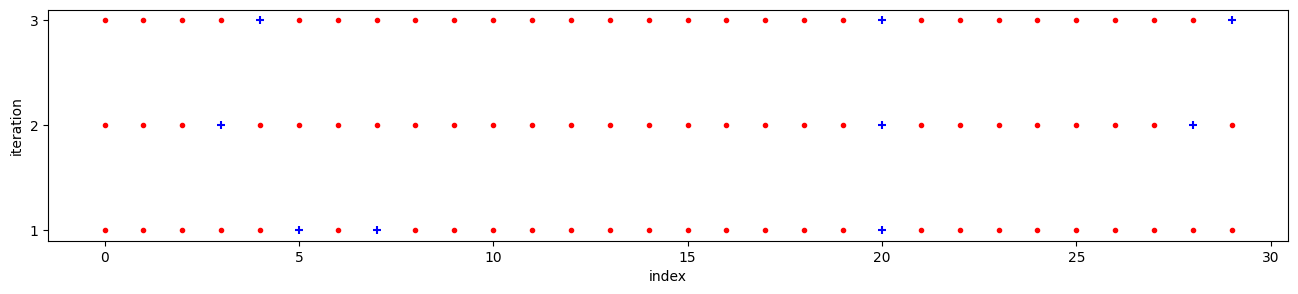

In [16]:
shs_cv = shs.split(X)
k = 1
plt.figure(figsize=(16,3))
for train_indices,test_indices in shs_cv:
    plt.scatter(train_indices,[k]*len(train_indices),marker=".",c="r")
    plt.scatter(test_indices,[k]*len(test_indices),marker="+",c="b")
    print("训练集索引-%d"%k,train_indices)
    print("测试集索引-%d"%k,test_indices)
    k+=1
    
plt.yticks([1,2,3],["1","2","3"])
plt.ylabel("iteration")
plt.xlabel("index")

# 留P法

In [17]:
from sklearn.model_selection import LeaveOneOut,LeavePOut

In [18]:
loo = LeaveOneOut()
lpo = LeavePOut

In [19]:
for i,j in loo.split(X):
    print(i,j)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [3]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [4]
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [5]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [6]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [7]
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [8]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [9]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20

# 自助法

In [20]:
XY_train = X.sample(50,replace=True)

In [21]:
xy_test = X.loc[data.index.difference(train_indices)].copy()

# 交叉验证

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [23]:
X= pd.DataFrame(X,columns=['Education'])

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 18 to 14
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  30 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [25]:
y = pd.DataFrame(y,columns=["Income"])

In [26]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 18 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Income  30 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


# 线性回归

In [27]:
# cross_val_score(LinearRegression(),X,y,cv=5)
cross_val_score(LinearRegression(),X,y,cv=5)

array([0.91005107, 0.93715404, 0.86752857, 0.7584715 , 0.93233851])

# 逻辑回归

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
cross_val_score(LogisticRegression(),X,y1,cv=shs)

array([1., 1., 1.])

In [30]:
print(cross_val_score(LogisticRegression(),X,y1,cv=5))

[1. 1. 1. 1. 1.]


In [31]:
print(cross_val_score(LogisticRegression(),X,y1,cv=loo))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


# 学习曲线

##### 学习曲线（learning curve）是关于模型在训练集和测试集上的预测性能曲线
##### 横轴为训练集的样本数量，纵轴为交叉验证的正确率
##### 能够判断模型的方差或偏差是否过高，以及增大训练集是否可以减小过拟合
![image.png](https://s2.loli.net/2022/11/19/3pReNGuvkCc9QAD.png)

![image.png](https://s2.loli.net/2022/11/19/CTPfJXsFZp57ERS.png)

In [32]:
# 可视化学习曲线
from sklearn.model_selection import learning_curve
# from sklearn.model_selection import 

In [33]:
estimator = LogisticRegression()

In [34]:
# cv = ShuffleSplit(n_splits=100,test_size=.2,random_state=0)
cv=ShuffleSplit(n_splits=5,random_state=10,test_size=.1)

In [35]:
learning_curve(estimator,X,y1,cv=cv,train_sizes=np.linspace(.1,1,5))

(array([ 2,  8, 14, 20, 27]),
 array([[nan,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]]),
 array([[       nan, 0.66666667, 0.66666667, 1.        , 1.        ],
        [0.66666667, 0.66666667, 0.66666667, 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.66666667, 0.66666667, 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ]]))

In [36]:
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=1,
                        train_sizes=np.linspace(.05,1.,20),verbose=0):
    """
    画出car_data在模型上的leaening curve
    参数解释：
    estimator：分类器的使用
    title：表格的标题
    X：输入的feature,numpy类型
    y: 输入的targer vector
    ylim : tuple 格式的（ymin,ymax），设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation 的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为
    training(默认为3份
    n_jobs : 并行的的任务数(默认1)

    """
    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,
                                                         train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_score_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,
                    train_scores_mean+train_scores_std,alpha=0.1,
                    color = "r")
    plt.fill_between(train_sizes,test_score_mean-test_scores_std,
                    test_score_mean+test_scores_std,alpha=0.1,
                    color="g")
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label="Training score")
    plt.plot(train_sizes,test_score_mean,'o-',color='g',label="Cross-validation score")
    plt.legend(loc='best')
    return plt


    

<module 'matplotlib.pyplot' from 'C:\\Users\\morang\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

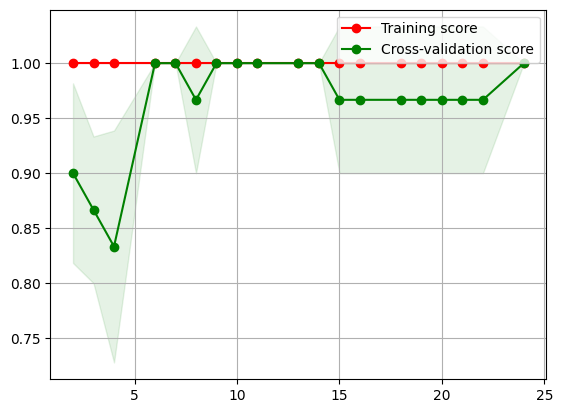

In [37]:
plot_learning_curve(estimator,u"学习曲线",X,y1)

# 参数调优

In [40]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [41]:
data=pd.read_csv("../car_evaluation.csv",names=["buying","maint","doors","persons","lug_boot","safety","car_Eva"])
data.head()

,buying,maint,doors,persons,lug_boot,safety,car_Eva
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [42]:
data.dropna(inplace=True)
data=pd.get_dummies(data,columns=["doors","persons","buying","maint","lug_boot","safety"])
data["car_Eva"]=data["car_Eva"].map({"unacc":0,"acc":1,"good":1,"vgood":1})
X=data.drop(["car_Eva"],axis=1)
y=data["car_Eva"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
KNeighborsClassifier()

KNeighborsClassifier()

In [44]:
for i in ["gini", "entropy"]:
    for j in [3,4,5,6,7,8,9,10,11,12,13,14]:
        d_m=DecisionTreeClassifier(criterion=i,max_depth=j)
        d_m.fit(X_train,y_train)
        print("criterion=",i,"max_depth=",j,"score=",d_m.score(X_test,y_test))
        

criterion= gini max_depth= 3 score= 0.9017341040462428
criterion= gini max_depth= 4 score= 0.9094412331406551
criterion= gini max_depth= 5 score= 0.9499036608863198
criterion= gini max_depth= 6 score= 0.9421965317919075
criterion= gini max_depth= 7 score= 0.976878612716763
criterion= gini max_depth= 8 score= 0.9691714836223507
criterion= gini max_depth= 9 score= 0.9922928709055877
criterion= gini max_depth= 10 score= 0.9884393063583815
criterion= gini max_depth= 11 score= 0.9961464354527938
criterion= gini max_depth= 12 score= 0.9961464354527938
criterion= gini max_depth= 13 score= 0.9961464354527938
criterion= gini max_depth= 14 score= 0.9942196531791907
criterion= entropy max_depth= 3 score= 0.9017341040462428
criterion= entropy max_depth= 4 score= 0.8978805394990366
criterion= entropy max_depth= 5 score= 0.9479768786127167
criterion= entropy max_depth= 6 score= 0.9441233140655106
criterion= entropy max_depth= 7 score= 0.976878612716763
criterion= entropy max_depth= 8 score= 0.976878

In [45]:
for i in np.arange(3,100,1):
    for j in ["kd_tree","ball_tree","auto"]:
        knn_m=KNeighborsClassifier(n_neighbors=i,algorithm=j)
        knn_m.fit(X_train,y_train)
        print("n_neighbors=",i,"algorithm=",j,"score=",knn_m.score(X_test,y_test))
        

n_neighbors= 3 algorithm= kd_tree score= 0.9113680154142582
n_neighbors= 3 algorithm= ball_tree score= 0.9132947976878613
n_neighbors= 3 algorithm= auto score= 0.9132947976878613
n_neighbors= 4 algorithm= kd_tree score= 0.8940269749518305
n_neighbors= 4 algorithm= ball_tree score= 0.8940269749518305
n_neighbors= 4 algorithm= auto score= 0.9364161849710982
n_neighbors= 5 algorithm= kd_tree score= 0.930635838150289
n_neighbors= 5 algorithm= ball_tree score= 0.930635838150289
n_neighbors= 5 algorithm= auto score= 0.9614643545279383
n_neighbors= 6 algorithm= kd_tree score= 0.9229287090558767
n_neighbors= 6 algorithm= ball_tree score= 0.9229287090558767
n_neighbors= 6 algorithm= auto score= 0.9479768786127167
n_neighbors= 7 algorithm= kd_tree score= 0.9653179190751445
n_neighbors= 7 algorithm= ball_tree score= 0.9653179190751445
n_neighbors= 7 algorithm= auto score= 0.9788053949903661
n_neighbors= 8 algorithm= kd_tree score= 0.9576107899807321
n_neighbors= 8 algorithm= ball_tree score= 0.95

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid={"C":np.arange(0.1,1,0.1),"gamma":np.arange(0.1,1,0.1)}
grid_search=GridSearchCV(SVC(),param_grid=param_grid,cv=5)

In [47]:
%time grid_search.fit(X_train,y_train)

CPU times: total: 17.2 s
Wall time: 17.2 s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [48]:
grid_search.score(X_test,y_test)

0.9980732177263969

In [49]:
grid_search.best_params_

{'C': 0.9, 'gamma': 0.6}

In [50]:
grid_search.best_score_

0.9793148383114433

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
#param_grid={"C":[0.1,1,10,100],"gamma":[0.1,1,10,100]}
grid_searchr=RandomizedSearchCV(SVC(),param_grid,cv=5)

In [52]:
%time grid_searchr.fit(X_train,y_train)
#grid_searchr.score(X_test,y_test)

CPU times: total: 1.98 s
Wall time: 1.99 s


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [53]:
grid_searchr.best_params_

{'gamma': 0.5, 'C': 0.9}

In [54]:
grid_searchr.best_score_

0.9776619457494599

In [55]:
grid_searchr.score(X_test,y_test)

0.9980732177263969